<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_ANN_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.9MB/s 


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 165.33 MiB | 30.42 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 23.02 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)


In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     118  251.596649  250.809525  ...  151.072678  144.269455  137.910355
1     141    0.842261    1.835169  ...    1.401388    1.000000    1.000000
2     156   41.052597   43.404999  ...  130.884293  138.441818  132.468124
3     179  125.842705  138.736862  ...  177.770905  182.997803  181.607758
4     181  145.465836  143.510895  ...  185.652512  223.665054  121.499588
5     167  142.363434  142.535355  ...    1.700778    0.880562    0.195776
6     110   25.285286   22.712067  ...    0.212231    0.944463    1.000000
7     122  196.332962  198.579666  ...  195.338867  165.879333  158.503357
8     157   40.656864   53.032867  ...   17.603231   20.437868   25.865595
9     187  110.389717  139.551666  ...    1.349653    0.191284    1.344305
10    110  115.407272  108.004951  ...    0.973884    0.004628    1.078347
11    145  155.687744  148.938263  ...  165.824509  164.255798  163.066742
12    136  153.220596   8

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 23.41 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
12  101.0   85.437416   93.088615  ...   81.488388   87.320267   88.294678
27  133.0   97.601105  104.570633  ...   85.013855   88.166206   91.628815
29  101.0   77.419968   76.044022  ...   38.198509   37.763065   38.304581
38  114.0   68.579872    6.544168  ...    0.000000    0.000000    0.000000
13  114.0   65.956596   63.012928  ...   55.815632   57.075409   60.637123
17  183.0    3.966526    1.008301  ...   80.980179   78.568245   78.959717
38  130.0   47.740593   49.920006  ...   58.952900   77.835976  102.712189
42  184.0  121.929100  137.344498  ...   85.265594   84.289215   82.071831
17  191.0   81.531052   83.274857  ...   35.537212   29.965981   27.538910
32  194.0   56.808266   56.397381  ...  118.537773  125.253151  121.501205
30  192.0   67.588539   64.065971  ...    0.034722    0.000000    0.000000
47  160.0   39.808750   38.264374  ...   38.240623   33.076874   28.080000
48  200.0   94.407196   9

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 569, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (329/329), done.
remote: Total 569 (delta 200), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (569/569), 4.92 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (337/337), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.39 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
12,101.0,85.437416,93.088615,104.906776,106.571716,102.366928,92.824921,89.184105,87.462112,84.295769,84.707283,85.634445,83.741104,82.389175,81.075974,79.031769,75.147629,74.294189,74.532990,72.947655,68.816689,59.375946,48.536026,43.467308,42.484070,43.690819,45.969807,48.443977,51.694443,78.920799,80.088333,81.329086,86.045105,87.700722,85.341141,82.424370,81.933632,79.736595,78.090675,79.466431,...,103.726112,94.594650,81.806496,77.812569,81.796982,86.699051,89.094986,87.519455,70.918449,73.546616,80.177628,84.674843,37.010983,34.471230,41.395550,63.001472,78.605042,92.637398,108.250961,121.770416,125.888046,125.854141,127.199402,128.352219,125.969513,119.389175,107.026573,100.303307,99.284981,91.421242,86.127045,85.692772,89.340164,91.826401,93.405945,89.931381,79.118225,81.488388,87.320267,88.294678
27,133.0,97.601105,104.570633,115.628815,122.254845,115.166206,114.274239,115.800552,123.955673,125.828255,120.282547,103.329636,96.554016,102.418282,100.534630,100.401672,100.490303,97.373962,85.817177,58.495842,46.180058,47.049862,48.927979,47.703602,48.252079,47.132965,46.601109,47.667587,48.903046,57.490303,62.155125,74.193909,83.401672,96.241005,106.894745,112.764542,119.412735,124.277008,124.659279,110.265930,...,114.545700,112.551254,107.116341,97.210533,76.523544,56.628807,64.498619,73.141273,80.781158,84.842110,88.011078,90.686981,64.263161,80.024933,95.390579,106.171738,108.160667,105.534630,103.803322,105.260391,105.997223,105.648201,108.055397,108.963989,110.401665,111.559555,112.723000,112.850410,111.326866,107.072029,97.542931,77.365646,53.022160,44.639893,56.864269,73.717453,81.839340,85.013855,88.166206,91.628815
29,101.0,77.419968,76.044022,75.398201,74.888443,73.454559,72.946190,74.077347,74.254196,76.387215,80.399178,79.541321,76.580437,71.318985,68.777672,66.713760,61.971867,59.820705,59.950302,59.041180,58.711605,55.773750,49.904518,45.687187,43.949905,42.957947,54.112736,75.069214,82.110878,81.377022,74.197342,72.149498,70.854721,71.273018,72.191940,72.604355,73.206261,72.240364,75.312424,78.019119,...,97.728661,96.196259,87.109505,65.109299,41.980202,39.340458,41.283108,41.394276,39.143326,38.418686,38.642387,40.638664,100.242332,103.075783,105.000793,103.696014,100.076065,99.895897,98.428398,96.998924,96.385551,97.570930,96.826889,94.735718,96.492210,95.589157,94.069504,92.836685,91.612198,85.315948,67.715317,44.504269,37.850800,38.344868,39.945595,38.419273,37.830704,38.198509,37.763065,38.304581
38,114.0,68.579872,6.544168,6.405663,8.192059,15.395506,16.883963,18.871344,58.844257,85.074791,91.040321,91.857498,91.568176,90.959679,92.614342,94.775009,94.112648,92.997543,81.406891,43.864876,24.701447,21.060326,17.864265,17.256079,13.746693,8.633426,2.371191,0.887042,0.690059,51.431206,7.077255,7.401047,8.056017,11.401664,14.458603,44.916279,76.384430,82.719604,86.066483,86.176369,...,1.010465,1.006771,0.811942,0.320098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330255,0.612188,0.814712,1.128655,1.448446,0.991690,0.866420,0.754386,0.728532,0.263158,0.046168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,114.0,65.956596,63.012928,65.663582,65.039391,60.006767,50.364414,53.409973,63.036324,76.999382,94.997543,107.151428,113.288086,114.806702,112.154823,106.563255,99.224991,93.828560,89.813789,91.654968,93.962135,94.071716,96.015694,96.173286,92.521690,89.655281,86.654358,83.397659,80.973534,63.746696,63.036324,65.889503,69.100334,65.734070,63.025543,65.299164,74.903358,87.494308,101.152664,109.254845,...,54.438904,37.691597,28.330563,29.103107,30.529394,29.352417,33.058479,38.558632,45.974457,51.

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

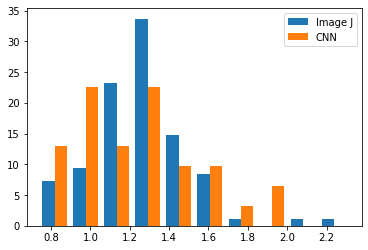

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

<a list of 2 Lists of Patches objects>
[0.73909262 0.89692728 1.05476194 1.21259659 1.37043125 1.52826591
 1.68610056 1.84393522 2.00176988 2.15960453 2.31743919]
[[ 7.36842105  9.47368421 23.15789474 33.68421053 14.73684211  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [12.90322581 22.58064516 12.90322581 22.58064516  9.67741935  9.67741935
   3.22580645  6.4516129   0.          0.        ]]


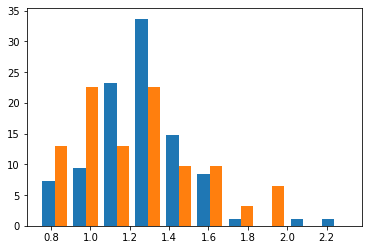

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

200.00000000000003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


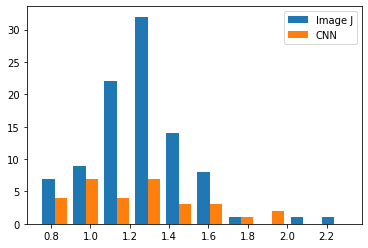

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1